# Sentiment analysis using Natural Language Processing (NLP) 

#### For this repository we will use a dataset generously provided by Luís Fred, called "IMDB-PT-BR", which contains the portuguese translation of the movie reviews.

### Step 1: Exploring text data

In [1]:
import pandas as pd

reviews = pd.read_csv("imdb-reviews-pt-br.csv")
reviews.head(10)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg


In [2]:
classification = reviews["sentiment"].replace(["neg", "pos"],[0, 1])

In [3]:
reviews["classification"] = classification
reviews.head()

,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [4]:
reviews.tail()

,id,text_en,text_pt,sentiment,classification
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [5]:
print(reviews["classification"].value_counts())

0    24765
1    24694
Name: classification, dtype: int64


We have almost the same proportion of negative and positive in our dataset

### Step 2: Vectorizing the text data to extract the top 50 used words



In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorize = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vectorize.fit_transform(reviews["text_pt"])

In [7]:
print(bag_of_words.shape)

(49459, 50)


Now we have a 50 dimensional representation for each review and we will apply a Logistic Regression to measure the accuracy before preprocessing treatments.

In [8]:
from sklearn.model_selection import train_test_split

train, test, class_train, class_test = train_test_split(bag_of_words,
                                                              reviews["classification"],
                                                              random_state = 42)


In [9]:
print(train.shape)
print(test.shape)

(37094, 50)
(12365, 50)


In [10]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver = "lbfgs")
logistic_regression.fit(train, class_train)
forecast_test = logistic_regression.predict_proba(test)
print(forecast_test)

[[0.25696739 0.74303261]
 [0.72224991 0.27775009]
 [0.70076066 0.29923934]
 ...
 [0.46019618 0.53980382]
 [0.46166722 0.53833278]
 [0.61777927 0.38222073]]


In [11]:
forecast_test_bol = forecast_test[:,1] >= 0.5
print(forecast_test_bol)

[ True False False ...  True  True False]


In [12]:
import numpy as np

forecast_test_int = forecast_test_bol.astype(np.int)
print(forecast_test_int)

[1 0 0 ... 1 1 0]


In [13]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(class_test, forecast_test_int)
print(accuracy_test)

0.6583097452486858


We were able to reach an accuracy of 65%. The result appears to be relatively low, however, is an expressive result, as the machine is getting it right more than the average.
Now we will proceed to data preprocessing to improve this score.

### Step 3: Visualizing the dataset with WordCloud

In this step we will see which words appear more frequently on each sentiments, for that, we will use the Word cloud where the most frequent words appear larger and occupy bigger space in the figure. Thus, we can get some insights into how to manipulate the text to bring the most semantically relevant words close to the top 50 positions.

In [14]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in reviews["text_pt"]])

In [15]:
word_cloud = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(all_words)

In [16]:
positive_reviews = reviews.query("sentiment == 'pos'")

In [17]:
positive_reviews.head()

,id,text_en,text_pt,sentiment,classification
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1


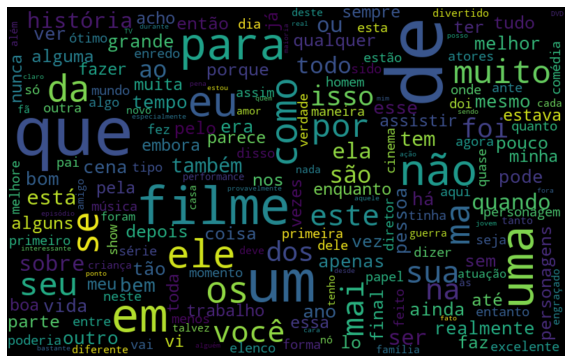

In [18]:
import matplotlib.pyplot as plt

positive_words = ' '.join([text for text in positive_reviews["text_pt"]])
word_cloud = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
negative_reviews = reviews.query("sentiment == 'neg'")

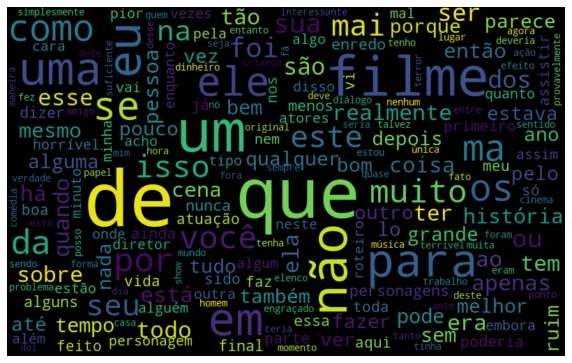

In [20]:
negative_words = ' '.join([text for text in negative_reviews["text_pt"]])
word_cloud = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

 In both cases, there are words that do not add semantically, but other significant words that did not exist before start to appear, such as "ótimo", "melhor","amor" with positive connotations, and in the negative cloud, "ruim", "horrível", "má" " with negative connotation.

### Step 4: Tokenize the dataset with NLTK

Now we need to calculate the frequencies of all the words in the dataset.
For this, we will use NLTK to  tokenize and store them in a DataFrame.


In [21]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [22]:
from nltk import tokenize

all_words = ' '.join([text for text in reviews["text_pt"]])
token_space= tokenize.WhitespaceTokenizer()
frequency = nltk.FreqDist(token_space.tokenize(all_words))
df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                             "Frequency": list(frequency.values())})



In [23]:
df_frequency.head()

,Word,Frequency
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [24]:
df_frequency = df_frequency.nlargest(columns = "Frequency", n = 10)

In [25]:
df_frequency

,Word,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


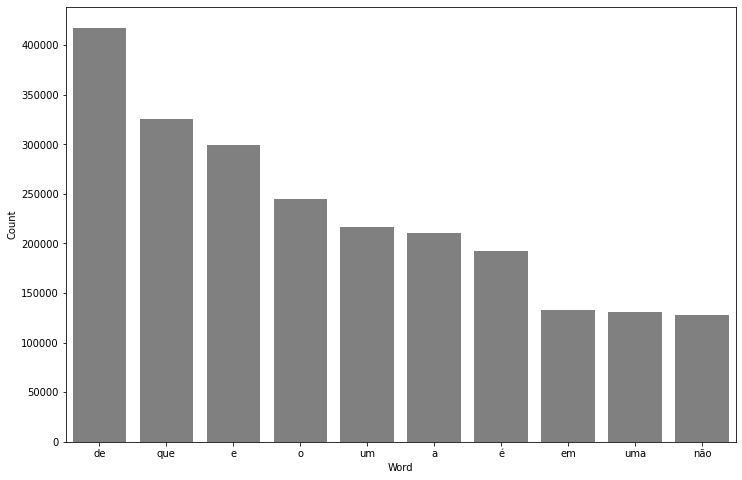

In [26]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequency, x= "Word", y = "Frequency", color = 'gray')
ax.set(ylabel = "Count")
plt.show()

The words most often involve "de", "que", "e", "uma" and others, which do not aggregate semantically, the stop words. 

### Step 5: Treatments

### Treatment 1: Using NLTK, we will exclude all the portuguese stop words from the dataset. 

In [27]:
irrelevant_words = nltk.corpus.stopwords.words("portuguese")
processed_phrase = list()

for opinion in reviews["text_pt"]:
    new_phrase = list()
    word_text = token_space.tokenize(opinion)
    for Word in word_text:
        if Word not in irrelevant_words:
            new_phrase.append(Word)
    processed_phrase.append(' '.join(new_phrase))
    
reviews["treatment_1"] = processed_phrase


    

In [28]:
reviews.head()

,id,text_en,text_pt,sentiment,classification,treatment_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [29]:
print("Phrase text_pr\n")
print(reviews["text_pt"][0])
print("\n Phrase treatment_1\n")
print(reviews["treatment_1"][0])



Phrase text_pr

Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.

 Phr

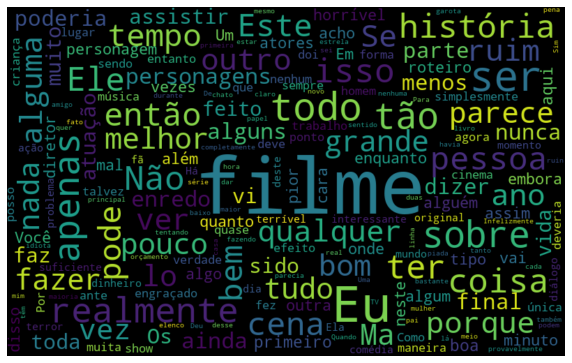

In [30]:
def word_cloud_neg(text, column_text):
    negative_text = text.query("sentiment == 'neg'")
    all_words = ' '.join([text for text in negative_text[column_text]])
    word_cloud = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
word_cloud_neg(reviews, "treatment_1")


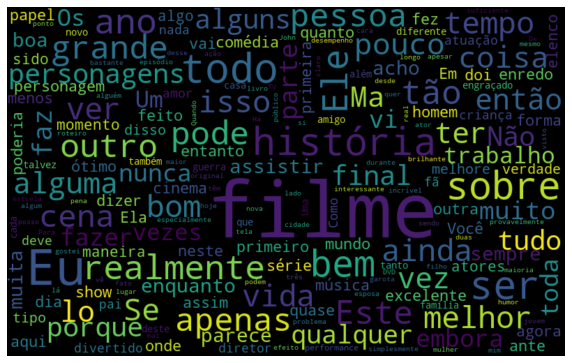

In [31]:
def cloud_positive_words(text, column_text):
    text_positive = text.query("sentiment == 'pos'")
    all_words = ' '.join([text for text in text_positive[column_text]])
    word_cloud = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
cloud_positive_words(reviews, "treatment_1")    


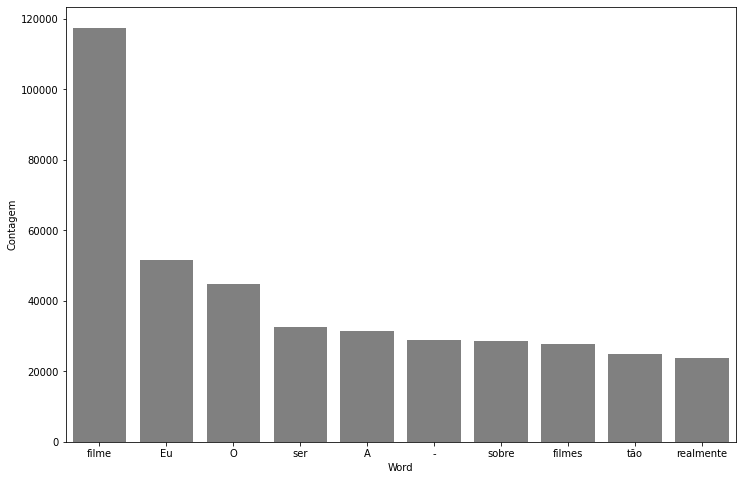

In [32]:
def pareto(text, column_text, quantidade):
    all_words = ' '.join([text for text in text[column_text]])
    frequency = nltk.FreqDist(token_space.tokenize(all_words))
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                 "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x= "Word", y = "Frequency", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

pareto(reviews, "treatment_1", 10)

In [33]:
def classify_text(text, column_text, column_classification):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(text[column_text])
    train, test, class_train, class_test = train_test_split(bag_of_words,
                                                                 text[column_classification],
                                                                 random_state = 42)
    
    logistic_regression = LogisticRegression(solver="lbfgs")
    logistic_regression.fit(train, class_train)
    
    return logistic_regression.score(test, class_test)

accuracy_test = classify_text(reviews, "treatment_1", "classification")
print(accuracy_test)

0.6607359482410028


After removing the Stop Words from the Dataset, we were able to improve the accuracy score from 65% to 66%.

### Treatment 2: Exclude the punctuation from the dataset to prevent words followed by punctuation from being considered different.

In [39]:
from string import punctuation
token_pontuacao= tokenize.WordPunctTokenizer()
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + irrelevant_words

processed_phrase = list()
for opinion in reviews["treatment_1"]:
    new_phrase = list()
    word_text = token_pontuacao.tokenize(opinion)
    for Word in word_text:
        if Word not in pontuacao_stopwords:
            new_phrase.append(Word)
    processed_phrase.append(' '.join(new_phrase))
    
reviews["treatment_2"] = processed_phrase

In [36]:
reviews.head()

,id,text_en,text_pt,sentiment,classification,treatment_1,column_classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [40]:
reviews["treatment_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [41]:
reviews["treatment_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

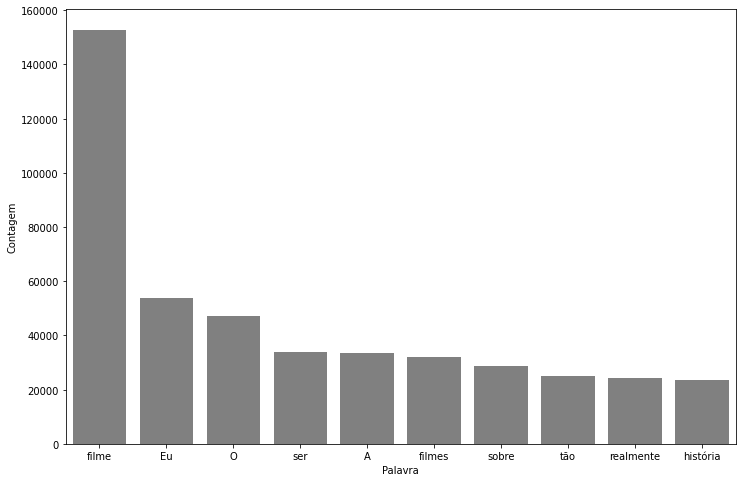

In [ ]:
pareto(reviews, "treatment_2", 10)

We can check that we don't have the "." between the top positions, and entered the word "realmente"

We can observe that the word "é", for example, is a stopword that can be removed excluding the accent. As well as other stopwords that were not removed from the dataset because it has not an accent, such as "nao".
To be able to exclude these stopwords, we must normalize the dataset of the last treatment using the Unicode library.

### Treatment 3: remove the puntuation and the accent from the dataset


In [42]:
!pip install unidecode

     |████████████████████████████████| 235 kB 4.4 MB/s 


In [44]:
import unidecode
without_accent = [unidecode.unidecode(text) for text in reviews["treatment_2"]]

In [45]:
without_accent[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [46]:
stopwords_without_accent = [unidecode.unidecode(text) for text in pontuacao_stopwords]


In [47]:
stopwords_without_accent

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [48]:
reviews["treatament_3"] = without_accent

processed_phrase = list()
for opinion in reviews["treatament_3"]:
    new_phrase = list()
    word_text = token_pontuacao.tokenize(opinion)
    for Word in word_text:
        if Word not in stopwords_without_accent:
            new_phrase.append(Word)
    processed_phrase.append(' '.join(new_phrase))
    
reviews["treatament_3"] = processed_phrase

In [49]:
reviews.head()

,id,text_en,text_pt,sentiment,classification,treatment_1,column_classification,treatment_2,treatament_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [50]:
accuracy_treatment3 = classify_text(reviews, "treatament_3", "classification")
print(accuracy_treatment3)




0.6810351799433886



After removing the punctuation and accents from the dataset, the accuracy increased from 66% to 68%.

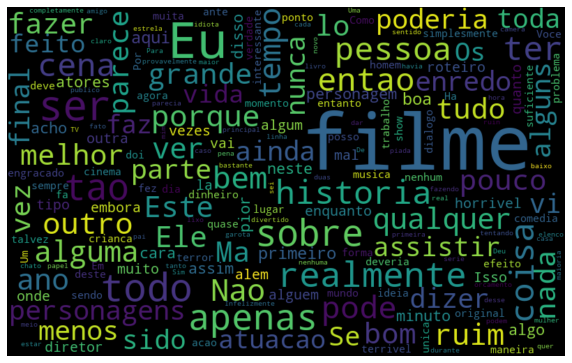

In [51]:
word_cloud_neg(reviews, "treatament_3")

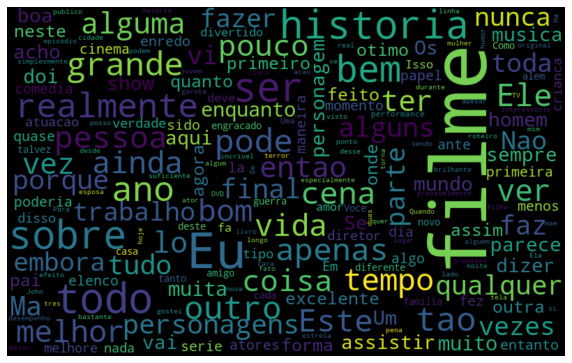

In [52]:
cloud_positive_words(reviews, "treatament_3")

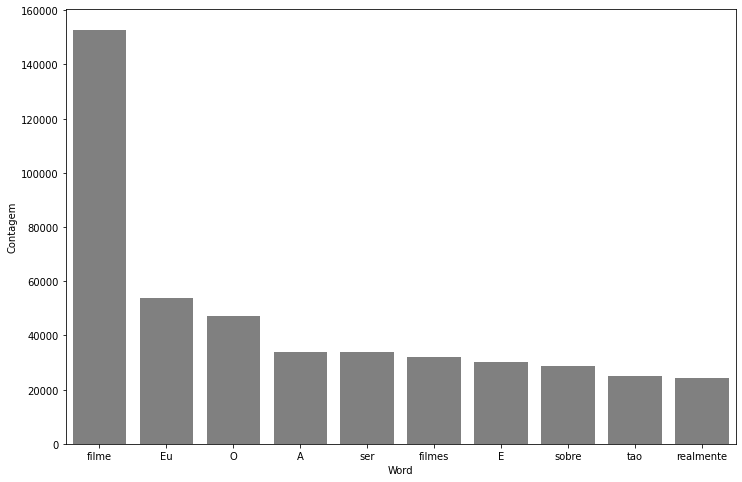

In [53]:
pareto(reviews, "treatament_3", 10)

Looking at the chart, we can see that the stopwords "Eu", "O" and "A" are still present in our dataset. To exclude these words we must convert all data to lowercase. We will do this by creating a new sentence and using the lower() method.

### Treatment 4: convert all data to lowercase

In [54]:
processed_phrase = list()
for opinion in reviews["treatament_3"]:
    new_phrase = list()
    opinion = opinion.lower()
    word_text = token_pontuacao.tokenize(opinion)
    for Word in word_text:
        if Word not in stopwords_without_accent:
            new_phrase.append(Word)
    processed_phrase.append(' '.join(new_phrase))
    
reviews["treatment_4"] = processed_phrase


In [55]:
reviews["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [56]:
reviews["treatment_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [57]:
accurcy_treatment4 = classify_text(reviews, "treatment_4", "classification")
print(accurcy_treatment4)
print(accuracy_treatment3)


0.6879094217549535
0.6810351799433886



As a result, we have 0.687 against 0.681 in the previous treatment, that is, we improve practically 6 tenths of our result with a single treatment.

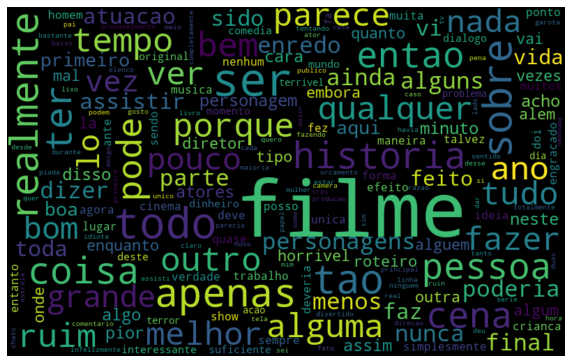

In [58]:
word_cloud_neg(reviews, "treatment_4")

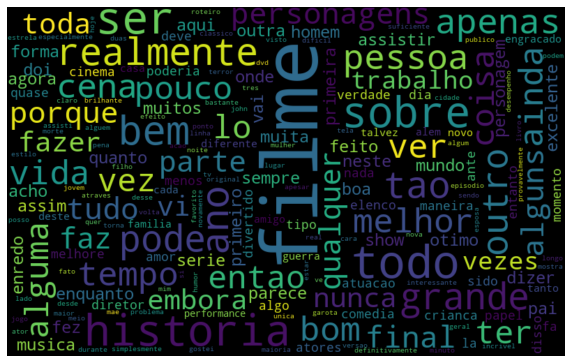

In [59]:
cloud_positive_words(reviews, "treatment_4")

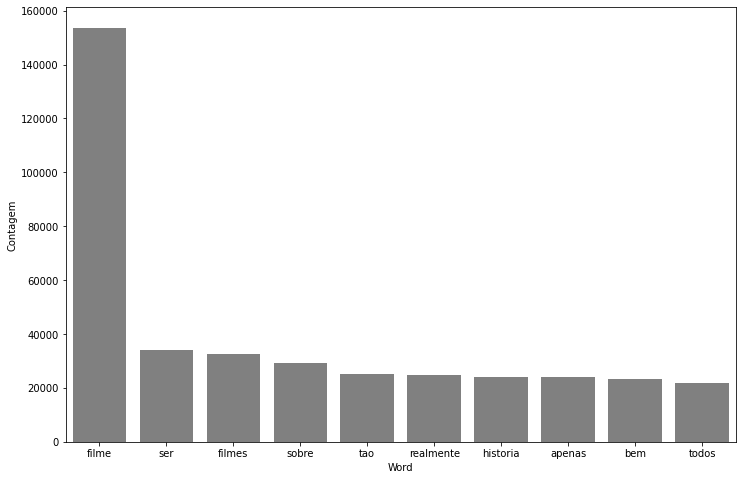

In [60]:
pareto(reviews, "treatment_4", 10)

From the graph, we can see that some words that were more evident were dropped out of wordclouds. "Filme", for example, is increasingly evident. Furthermore, in the negative cloud, "ruim", "terrível" e "horrível", which are words with negative feelings, occupy more and more space. In the positive cloud, "otimo", "bom" e "melhor" are also becoming more evident.

### Treatment 5: removing the suffixes from the words

In [62]:
stemmer= nltk.RSLPStemmer()
processed_phrase = list()
for opinion in reviews["treatment_4"]:
    new_phrase = list()
    word_text = token_pontuacao.tokenize(opinion)
    for Word in word_text:
        if Word not in stopwords_without_accent:
            new_phrase.append(stemmer.stem(Word))
    processed_phrase.append(' '.join(new_phrase))
    
reviews["treatment_5"] = processed_phrase



In [63]:
accuracy_treatment5 = classify_text(reviews, "treatment_5", "classification")
print(accuracy_treatment5)
print(accurcy_treatment4)


0.6943792964011323
0.6879094217549535


As a result, we could increase more 0.006 in the accuracy score after removing the suffixes. 

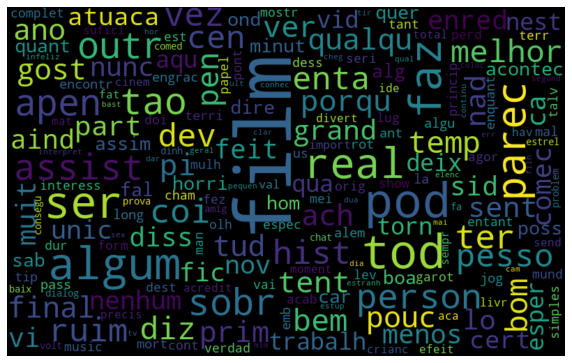

In [64]:
word_cloud_neg(reviews, "treatment_5")

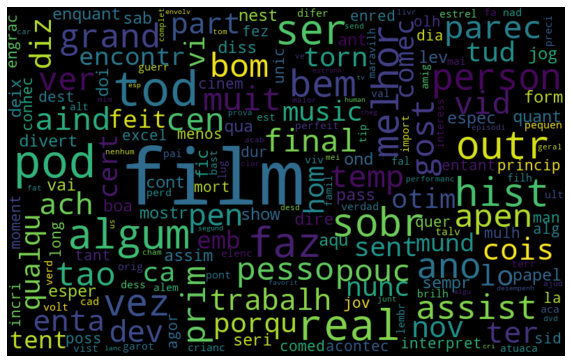

In [65]:
cloud_positive_words(reviews,"treatment_5")


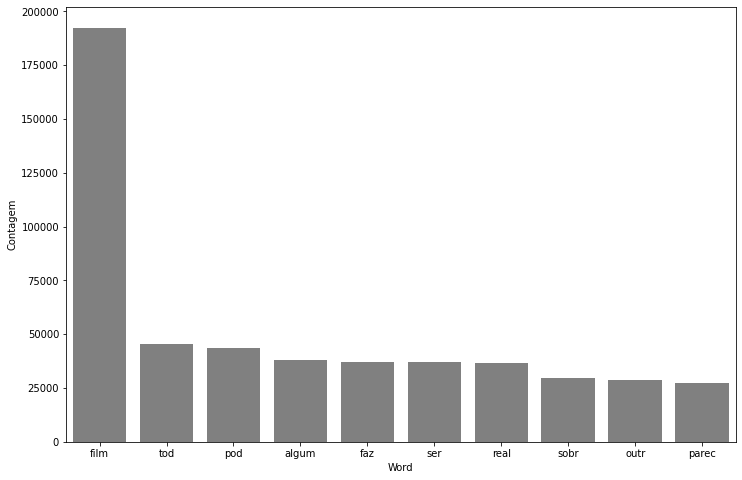

In [66]:
pareto(reviews, "treatment_5", 10)


### Vectorize with TF-IDF: weights the word counts by a measure of how often they appear in the dataset

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(lowercase= False, max_features=50)
tfidf_treated = tfidf.fit_transform(reviews["treatment_5"])
train, test, classe_train, class_test = train_test_split(tfidf_treated,
                                                              reviews["classification"],
                                                              random_state = 42)
logistic_regression.fit(train, class_train)
accuracy_tfidf_treated = logistic_regression.score(test, class_test)
print(accuracy_tfidf_treated)


0.6988273352203801


In [69]:
print(accuracy_treatment5)

0.6943792964011323


On the output, we get 0.6988, a value a little higher than treatment_5, which was 0.6943. Therefore, TD-IDF is proving to be a better way to handle our data.

### Vectorize with N-grams: generates a value that preserves the word contiguous sequence of n items from a text

In [70]:
from nltk import ngrams

tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(reviews["treatment_5"])
train, test, class_train, class_test = train_test_split(vetor_tfidf,
                                                              reviews["classification"],
                                                              random_state = 42)
logistic_regression.fit(train, class_train)
accuracy_tfidf_ngrams = logistic_regression.score(test, class_test)
print(accuracy_tfidf_ngrams)


0.8858875859280226


By using bigrams to preserve the sequence of the words, our accuracy score increased to 88.5%.

One interesting thing that logistic regression allows us is to analyze which words have the greatest weight in differentiating between classes and what the algorithm is understanding as negative or positive words. For this, we will create a new dataframe that will be stored in a variable "weight". 

In [71]:
weight = pd.DataFrame(
    logistic_regression.coef_[0].T,
    index = tfidf.get_feature_names()
)

weight.nlargest(50,0)

,0
otim,9.883148
excel,8.998212
perfeit,6.909051
maravilh,6.277557
favorit,5.888959
incri,5.746389
divert,5.411610
brilh,4.856989
ador,4.570598
hoj,4.491365


In [72]:
weight.nsmallest(10,0)

,0
ruim,-11.761766
pi,-11.424122
horri,-9.701481
terri,-8.386112
nad,-7.610627
chat,-7.508107
parec,-6.628180
nenhum,-6.369930
tent,-5.774706
mal,-5.710310


We can observe that the greater the positive weight of the words, the more positive words they are. For the negative weights, in turn, are the words of negative reviews.